## EDA & Cleaning: Exploring continuous features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare` features.**

### Read in data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
titanic_df = pd.read_csv("../Data/titanic.csv")

In [8]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# drop all categorial features 
cat_features = ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

titanic_df.drop(cat_features, axis=1, inplace=True)

In [10]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


### Explore continuous features

In [11]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# to see the overview glance of survived / non survied group
titanic_df.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [13]:
titanic_df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [14]:
# see the overview glance of missing age group and non missing age group
titanic_df.groupby(titanic_df['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


### Plot continuous features

In [17]:
titanic_df[titanic_df['Survived'] == 0]['Age']

0      False
4      False
5       True
6      False
7      False
       ...  
884    False
885    False
886    False
888     True
890    False
Name: Age, Length: 549, dtype: bool

#### seaborn distribution plot

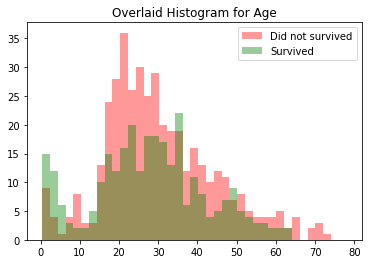

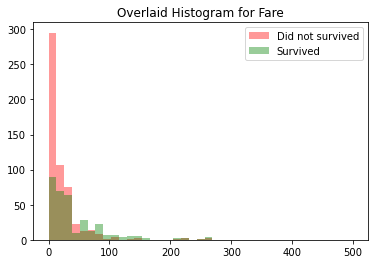

In [23]:
for i in ['Age', 'Fare']:
    died = list(titanic_df[titanic_df['Survived'] == 0][i].dropna())
    survived = list(titanic_df[titanic_df['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color= 'g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survived', 'Survived'])
    plt.title('Overlaid Histogram for {}'.format(i))
    plt.show()

#### using seaborn categorial plot to explore more

<Figure size 432x288 with 0 Axes>

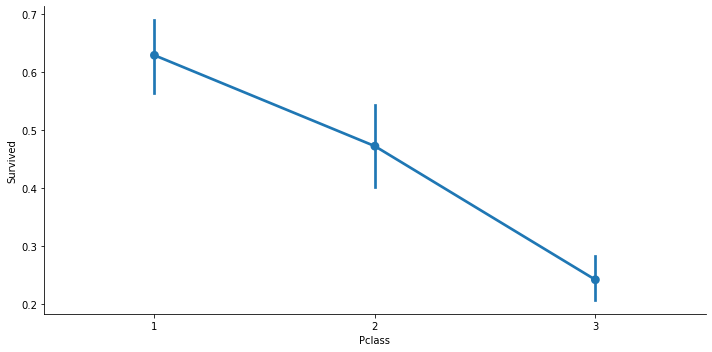

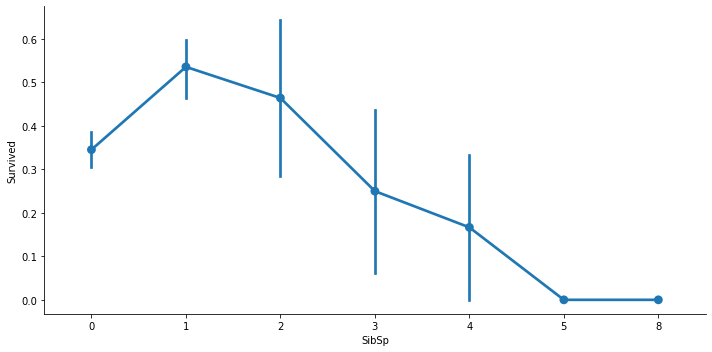

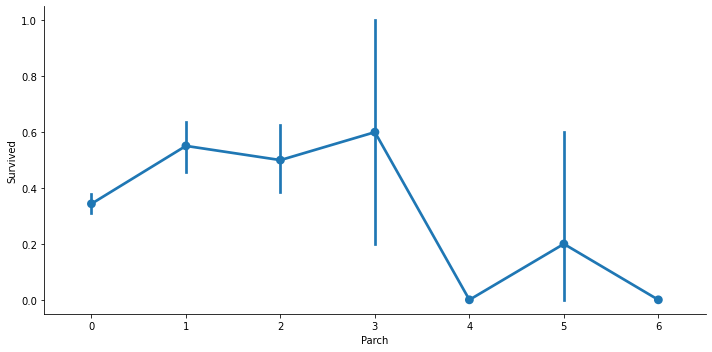

In [29]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
    plt.figure(i);
    sns.catplot(x=col, y='Survived', data=titanic_df , kind='point', aspect=2); # kind is what kind of graph, aspect is for how big the point is
    
# in the below charts, the shorter the line is the more confidence we are.
# some lines are longer because we may have less or missing data and don't have much confidence in it.

### as both Parch and SpSib have similarity, we will merge both data and explore a whole

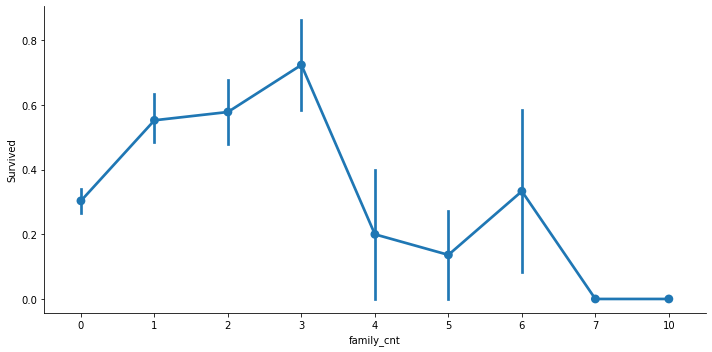

In [31]:
titanic_df['family_cnt'] = titanic_df['SibSp'] + titanic_df['Parch']
sns.catplot(x='family_cnt', y='Survived', data=titanic_df, kind='point', aspect=2)

#### we can see that the more family members, the less likely that person will survive.